## Mobile Price Prediction 

- **1. Brand me** This is first feature of our dataset. It's Denotes name of the mobile phones and   Brands.</br>
- **2.Ratings** This Feature Denotes Number of the ratings gave by the consumers for each mobile.</br>
- **3.RAM** It's have RAM size of the phone. </br>
- **4.ROM** It's have ROM **(Internal Memory)** size of the phone. </br>
- **5.Mobile_Size** It's represents how many inches of the particular mobile phone have. Here all the values are gave in **inches** </br>
- **6.Primary_Cam** It's Denotes Number of the pixels of the primary camera **(Back Camera)** for each mobiles.</br>
- **7.Selfi_Cam** It's Denotes Number of the pixels of the Selfi camera **(Front Camera)** for each mobiles.</br>
- **8.Battery_Power** It's Denotes amount of the battery power in each mobiles in **mAh**.</br>
- **9.Price** It's a Dependent Feature of the dataset. It's just denote prices of the each mobiles.

### Import the Libraires and Dataset

In [83]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [84]:
# Import Dataset
df = pd.read_csv("Data/data.csv")
df.head()

Unnamed: 0                         Brand me  Ratings  RAM    ROM  \
0           0            LG V30+ (Black, 128 )      4.3  4.0  128.0   
1           1                       I Kall K11      3.4  6.0   64.0   
2           2                     Nokia 105 ss      4.3  4.0    4.0   
3           3  Samsung Galaxy A50 (White, 64 )      4.4  6.0   64.0   
4           4       POCO F1 (Steel Blue, 128 )      4.5  6.0  128.0   

   Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  Price  
0         6.00           48       13.0           4000  24999  
1         4.50           48       12.0           4000  15999  
2         4.50           64       16.0           4000  15000  
3         6.40           48       15.0           3800  18999  
4         6.18           35       15.0           3800  18999

### Data Preprocessing

In [85]:
# Drop the Unwannted column the first one
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [86]:
# Checking null values into the dataset
df.isnull().sum()

Brand me           0
Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [87]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand me       836 non-null    object 
 1   Ratings        805 non-null    float64
 2   RAM            829 non-null    float64
 3   ROM            832 non-null    float64
 4   Mobile_Size    834 non-null    float64
 5   Primary_Cam    836 non-null    int64  
 6   Selfi_Cam      567 non-null    float64
 7   Battery_Power  836 non-null    int64  
 8   Price          836 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 58.9+ KB


In [88]:
df.dtypes

Brand me          object
Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [89]:
# Describe
df.describe()

Ratings         RAM         ROM  Mobile_Size  Primary_Cam  \
count  805.000000  829.000000  832.000000   834.000000   836.000000   
mean     4.103106    6.066345   64.373077     5.597282    47.983254   
std      0.365356    2.530336   53.447825     3.898664    11.170093   
min      2.800000    0.000000    0.000000     2.000000     5.000000   
25%      3.800000    6.000000   32.000000     4.500000    48.000000   
50%      4.100000    6.000000   40.000000     4.770000    48.000000   
75%      4.400000    6.000000   64.000000     6.300000    48.000000   
max      4.800000   34.000000  256.000000    44.000000    64.000000   

        Selfi_Cam  Battery_Power         Price  
count  567.000000     836.000000     836.00000  
mean     9.784832    3274.688995   18220.34689  
std      6.503838     927.518852   52805.55022  
min      0.000000    1020.000000     479.00000  
25%      5.000000    3000.000000     984.75000  
50%      8.000000    3000.000000    1697.00000  
75%     13.000000    3800.000000   18999.00000  
max     61.000000    6000.000000  573000.00000

In [90]:
df.shape

(836, 9)

In [91]:
# Dropping the Name columns
df.drop(['Brand me'],axis=1,inplace=True)

### Handling Missing Values

In [92]:
# We should handling these null or missing values
df.isnull().sum()

Ratings           31
RAM                7
ROM                4
Mobile_Size        2
Primary_Cam        0
Selfi_Cam        269
Battery_Power      0
Price              0
dtype: int64

In [93]:
#SimpleImputer handles missing values
null_columns = ['Ratings','RAM','ROM','Mobile_Size','Selfi_Cam']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[null_columns])
df[null_columns] = imputer.transform(df[null_columns])

In [94]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

### Feature Selection

In [95]:
# Lets try to understand which are important feature for this dataset
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [96]:
X = df.iloc[:,0:7]  # Independent columns
y = df.iloc[:,[-1]] # Target column i.e price range 

In [97]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [98]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [99]:
# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [100]:
featureScores

Specs          Score
0        Ratings      21.160894
1            RAM     604.937079
2            ROM   31220.048768
3    Mobile_Size     874.471349
4    Primary_Cam    1465.379223
5      Selfi_Cam    1362.095342
6  Battery_Power  156629.116310

In [101]:
print(featureScores.nlargest(4,'Score'))  #print 5 best features

           Specs          Score
6  Battery_Power  156629.116310
2            ROM   31220.048768
4    Primary_Cam    1465.379223
5      Selfi_Cam    1362.095342


In [102]:
df.head()

Ratings  RAM    ROM  Mobile_Size  Primary_Cam  Selfi_Cam  Battery_Power  \
0      4.3  4.0  128.0         6.00           48       13.0           4000   
1      3.4  6.0   64.0         4.50           48       12.0           4000   
2      4.3  4.0    4.0         4.50           64       16.0           4000   
3      4.4  6.0   64.0         6.40           48       15.0           3800   
4      4.5  6.0  128.0         6.18           35       15.0           3800   

   Price  
0  24999  
1  15999  
2  15000  
3  18999  
4  18999

## Model Fitting 

In [103]:
# Value Assigning
X = df.iloc[:,[6,2,4,5,1,3]]
y = df.iloc[:,[-1]]

In [104]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [105]:
# Random Forest Regressor
# Linear Regression
# DecisionTreeRegressor

### Random Forest Regressor 

In [106]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train,y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_452\4032883785.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


RandomForestRegressor()

In [107]:
y_pred = reg.predict(X_train)

In [108]:
# Training Score
print("Training Accuracy:",reg.score(X_train,y_train)*100)

Training Accuracy: 95.47042861299063


In [109]:
# Testing Score
print("Testing Accuracy:",reg.score(X_test,y_test)*100)

Testing Accuracy: 91.91688357731758


In [110]:
# Sample Prediction
reg.predict([[4.0,128.0,6.00,48,13.0,4000]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([190259.895])

### Linear Regression

In [111]:
from sklearn.linear_model import LinearRegression
lreg =LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression()

In [112]:
y_pred1 = lreg.predict(X_train)

In [113]:
# Training Score
print("Training Accuracy:",lreg.score(X_train,y_train)*100)

Training Accuracy: 13.468891773809212


In [114]:
# Testing Score
print("Testing Accuracy:",lreg.score(X_test,y_test)*100)

Testing Accuracy: 11.686789282126831


###  DecisionTreeRegressor


In [115]:
from sklearn.tree import DecisionTreeRegressor
dt =  DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [116]:
y_pred2 = dt.predict(X_train)

In [117]:
# Training Score
print("Training Accuracy:",dt.score(X_train,y_train)*100)

Training Accuracy: 97.96913411674413


In [118]:
# Testing Score
print("Testing Accuracy:",dt.score(X_test,y_test)*100)

Testing Accuracy: 95.79013452209944


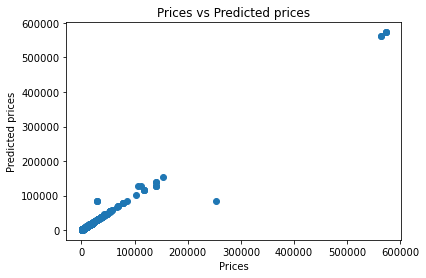

In [119]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred2)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [120]:
# Sample Prediction
dt.predict([[4.0,128.0,6.00,48,13.0,4000]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([84900.])

### Conclusion

#### Random Forest Regressor

- **Tarining Accuracy:** 96.5% Accuracy <br/>
- **Testing Accuracy:** 94.7% Accuracy

####  Linear Regression

- **Tarining Accuracy:** 13.4% Accuracy <br/>
- **Testing Accuracy:** 11.6% Accuracy

####  DecisionTreeRegressor

- **Tarining Accuracy:** 97.9% Accuracy <br/>
- **Testing Accuracy:** 95.7% Accuracy

In [121]:
#Save Model using pickle
#DecisionTreeRegressor
import pickle
pickle.dump( dt, open("model.pkl","wb"))